# Multi-Armed Bandit

I was reading and learning about the following three approaches to address Multi-Armed Bandit Problem.
- **$\epsilon$-greedy**  
  - $
    \text{select}
    \begin{cases}
      a^*=argmax \hat{Q}_t(a) & \text{with probability $1-\epsilon+\frac{\epsilon}{\text{num of actions}}$}\\
      \text{or any action a} & \text{with probability $\epsilon$}\\
    \end{cases}       
  $  
  - $\hat{Q}_t(a)$ is the estimated quality of action(or arm) a at time t, or the sample mean reward at time t.
  - $\epsilon$ is a small number in range [0, 1]. We want to select the action yielding highest return in the past with high probability.   

- **UCB1**  
  - **Hoeffding's Inequality**: Let $X_1$,...,$X_n$ be independent, identically distributed random variables, such that $0\leq X_i \leq 1$. Then, $P(E(X)>\frac{1}{n}\sum_{i=1}^{n}X_i+\epsilon)\leq e^{-2n\epsilon^2}$  
  - Replacing true mean and sample mean and we get $P(Q(a)>\hat{Q}_t(a)+\epsilon)\leq e^{-2t\epsilon^2}$
  - We want to be confident about the upper bound $\epsilon$, meaning a small $e^{-2t\epsilon^2}$. If we set this probability to decrease with time, say $t^{-4}$, then we get $\epsilon = \sqrt{\frac{2log(t)}{n_a}}$
  
  - select $a^*=argmax (\hat{Q}_t(a)+\sqrt{\frac{2lnN}{N_a}})$  
where $N$ is total number of games played, and $N_a$ is the number of time action $a$ is played

- **Thompson Sampling**  
  - Conjugate Distributions
    - likelihood of data is Bernoulli  
    - prior belief of success probability $\theta$ or $Q(a) \sim Beta(\alpha,\beta)$
    - $\text{posterior} \propto \text{likelihood} * \text{prior} \sim Beta(\alpha',\beta')$  
      where $\alpha' \leftarrow \alpha+x$, $\beta' \leftarrow \beta+(1-x)$  
  - At each time step t, we sample from prior $Beta(\alpha_i, \beta_i)$ and play the arm with highest $\tilde{Q}(a)$, and then update $\alpha$ and $\beta$ with the reward collected.
  



The following resources provided great help in explaining and implementing the algorithms
- Udemy Class - [Bayesian Machine Learning in Python: A/B Testing](https://www.udemy.com/course/bayesian-machine-learning-in-python-ab-testing/)  
  Class [Repo](https://github.com/lazyprogrammer/machine_learning_examples/blob/master/ab_testing/bayesian_bandit.py)
- Blog Post - ["The Multo-Armed Bandit Problem and Its Solutions" by Lilian Weng](https://lilianweng.github.io/lil-log/2018/01/23/the-multi-armed-bandit-problem-and-its-solutions.html)  
  Lilian's [implementation](https://github.com/lilianweng/multi-armed-bandit)




In [1]:
from bandits import run_experiment

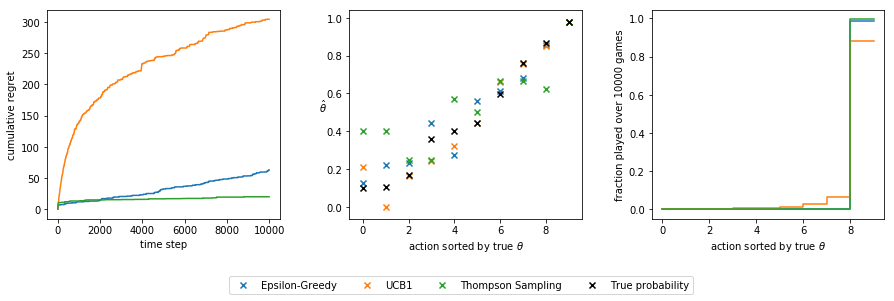

In [2]:
run_experiment(10, 10000)